In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
 import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import os

# Step 1: Load and preprocess the data
data_dir = "/content/drive/MyDrive/training_set"  # Data directory
image_size = (150, 150)  # Image size

# Load and label the images
images = []
labels = []

# Load images labeled as "cats"
cats_images = os.listdir(os.path.join(data_dir, "cats"))
for img_name in cats_images:
    img = tf.keras.preprocessing.image.load_img(
        os.path.join(data_dir, "cats", img_name), target_size=image_size
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img_array)
    labels.append(0)  # Label the image as 0 to represent cats

# Load images labeled as "dogs"
dogs_images = os.listdir(os.path.join(data_dir, "dogs"))
for img_name in dogs_images:
    img = tf.keras.preprocessing.image.load_img(
        os.path.join(data_dir, "dogs", img_name), target_size=image_size
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img_array)
    labels.append(1)  # Label the image as 1 to represent dogs

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Convert data values to [0, 1] range
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Step 2: Define the standard deep learning model
model_standard = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the standard model
model_standard.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Step 3: Train the standard deep learning model
history_standard = model_standard.fit(train_images, train_labels, epochs=10,
                                      validation_data=(test_images, test_labels))

# Step 4: Define the approximate Bayesian deep learning model with Monte Carlo dropout
class MC_Dropout(layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

model_bayesian = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    MC_Dropout(rate=0.5),  # Monte Carlo dropout layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the Bayesian model
model_bayesian.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Step 5: Train the approximate Bayesian deep learning model with Monte Carlo dropout
history_bayesian = model_bayesian.fit(train_images, train_labels, epochs=10,
                                      validation_data=(test_images, test_labels))

# Step 6: Evaluate both models and calculate standard deviation for the Bayesian model
test_loss_standard, test_accuracy_standard = model_standard.evaluate(test_images, test_labels)
test_loss_bayesian, test_accuracy_bayesian = model_bayesian.evaluate(test_images, test_labels)

print("Standard Model Test Accuracy:", test_accuracy_standard)
print("Bayesian Model Test Accuracy:", test_accuracy_bayesian)

# Monte Carlo dropout for approximate Bayesian inference
def mc_dropout_predict(model, X_test, num_samples):
    y_preds = np.stack([model.predict(X_test) for _ in range(num_samples)], axis=0)
    y_mean = np.mean(y_preds, axis=0)
    y_std = np.std(y_preds, axis=0)
    return y_mean, y_std

num_samples_mc_dropout = 50  # Number of Monte Carlo samples
y_mean_mc_dropout, y_std_mc_dropout = mc_dropout_predict(model_bayesian, test_images, num_samples_mc_dropout)

# Calculate standard deviation
std_dev_mc_dropout = np.mean(y_std_mc_dropout)

print("Standard Deviation of Bayesian Model (Monte Carlo Dropout):", std_dev_mc_dropout)

Epoch 1/10
75/75 [==============================] - 11s 57ms/step - loss: 0.7004 - accuracy: 0.5150 - val_loss: 0.6918 - val_accuracy: 0.5283
Epoch 2/10
75/75 [==============================] - 2s 30ms/step - loss: 0.6776 - accuracy: 0.5634 - val_loss: 0.6755 - val_accuracy: 0.5967
Epoch 3/10
75/75 [==============================] - 2s 29ms/step - loss: 0.6568 - accuracy: 0.6093 - val_loss: 0.6826 - val_accuracy: 0.5800
Epoch 4/10
75/75 [==============================] - 2s 28ms/step - loss: 0.6427 - accuracy: 0.6205 - val_loss: 0.6423 - val_accuracy: 0.6333
Epoch 5/10
75/75 [==============================] - 2s 30ms/step - loss: 0.6250 - accuracy: 0.6439 - val_loss: 0.6604 - val_accuracy: 0.6200
Epoch 6/10
75/75 [==============================] - 2s 29ms/step - loss: 0.5895 - accuracy: 0.6860 - val_loss: 0.6418 - val_accuracy: 0.6367
Epoch 7/10
75/75 [==============================] - 2s 32ms/step - loss: 0.5351 - accuracy: 0.7298 - val_loss: 0.5956 - val_accuracy: 0.6867
Epoch 8/10
7

## Conclosion

 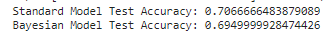

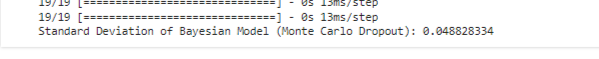